# In the main branch, this file should be no executed and with no parameters set.
# In the development branch, it must be fully executed and must include tests.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

import tools

## Parameters

In [3]:
# Set the path+filename of the database
# Example: 'bubble_filtering__8_neighbors_squared_network.db'


db_path = 'results_databases/bubble_filtering__8_neighbors_squared_network__MXU.csv'
v = 0.4

Hereafter, the code should not be modified at the standard usage.

## Functions

In [4]:
def test_scale_M_L(q, var_scale='L'):
       
    df = phys_quant.reset_index().copy()
    
    df = df[df.q==q]
    
    if var_scale == 'L':
        D = np.sqrt(df.N)
    elif var_scale == 'N':
        D = np.array(df.N)
    else:
        raise NotImplementedError(
            "Parameter 'scale_var' is not valid.") 
    
    df.set_index(['N'])
    
    r = tools.regression_power_law(D, df.M)
    
    x = np.logspace(np.log10(min(D)),np.log10(max(D)))
    y = 10**r.params[0]*x**(r.params[1])
    
    plt.plot(D, df.M, marker='o', ls='', lw=0.5)
    plt.plot(x, y, lw=0.5)
    plt.xlabel('%s' % var_scale, fontsize=16)
    plt.ylabel('M(q=%.3f)' % q, fontsize=16)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
    
    exp_string = tools.express_measure_with_error(r.params[1],
                                    np.sqrt(r.cov_params().loc['N'].N),
                                    label='__EMPTY__')
                                                 
    print('M(q=%.6f) ~ %s^(%s)' % (q, var_scale, exp_string))
    print()
    print('R² = %.6f' % r.rsquared)
    

## Main

In [5]:
# Read the physical quantities database
full = pd.read_csv(db_path, index_col=0)

# Select the data corresponding to the given visibility v.
phys_quant = full[full.v == v]

# Get the number of sites
N = phys_quant.N.unique()

# Set the index to N and q
phys_quant.set_index(['N','q'], inplace=True)

print('N =', N)

N = [  400  1600  3600  6400 10000]


### Magnetization

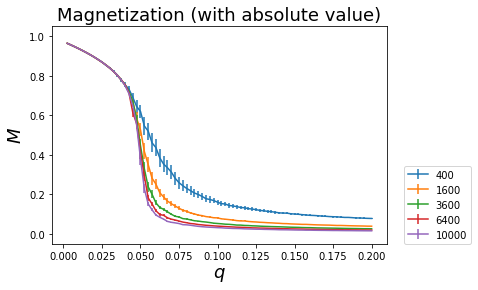

In [6]:
net_sizes = N[:]

for n in net_sizes:
    phys_quant.loc[n].M.plot(label='%d' % n, 
                             yerr=phys_quant.loc[n].M_err)
    
plt.xlabel('$q$', fontsize=18)
plt.ylabel('$M$', fontsize=18)
plt.title('Magnetization (with absolute value)', fontsize=18)
plt.legend(loc=(1.05,0))

#plt.xlim(0,0.051)
plt.ylim(-0.05,1.05)

plt.show()

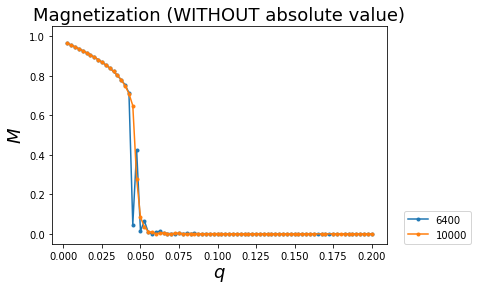

In [7]:
net_sizes = N[-2:]

for n in net_sizes:
    phys_quant.loc[n].M_noMod.abs().plot(label='%d' % n, marker='.')
    
plt.xlabel('$q$', fontsize=18)
plt.ylabel('$M$', fontsize=18)
plt.title('Magnetization (WITHOUT absolute value)', fontsize=18)
plt.legend(loc=(1.05,0))

#plt.xlim(0,0.051)
plt.ylim(-0.05,1.05)

plt.show()

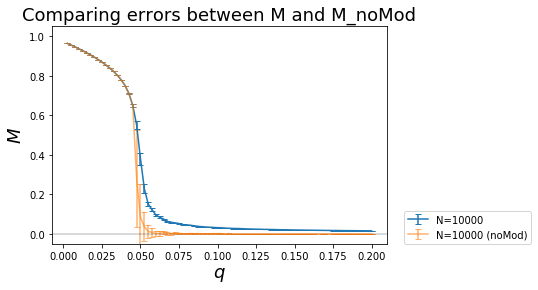

In [8]:
errorBar = True
net_sizes = [10000]
alpha = 0.6

for n in net_sizes:
    if errorBar:
        phys_quant.loc[n].M.plot(label='N=%d' % n, 
                yerr=phys_quant.loc[n].M_err, 
                capsize=3)
        phys_quant.loc[n].M_noMod.abs().plot(label='N=%d (noMod)' % n, 
                capsize=3, yerr=phys_quant.loc[n].M_noMod_err, 
                alpha=alpha)
    else:
        phys_quant.loc[n].M.plot(label='N=%d' % n)
        phys_quant.loc[n].M_noMod.abs().plot(
                    label='N=%d (noMod)' % n, alpha=alpha)
    
    
plt.xlabel('$q$', fontsize=18)
plt.ylabel('$M$', fontsize=18)
plt.title('Comparing errors between M and M_noMod', fontsize=18)
plt.legend(loc=(1.05,0))

plt.axhline(0,color='black',lw=0.3)

#plt.xlim(0,0.02)
plt.ylim(-0.05,1.05)

plt.show()

### Susceptibility

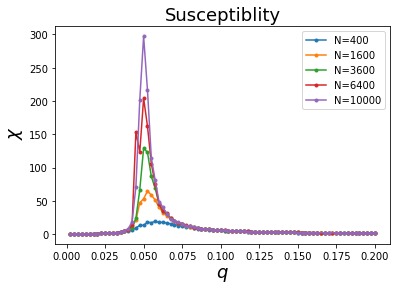

In [9]:
net_sizes = N[:]

for n in net_sizes:
    phys_quant.loc[n].X.plot(label='N=%d' % n, marker='.')

plt.xlabel('$q$', fontsize=18)
plt.ylabel(r'$\hspace{0.3}\chi$', fontsize=18) 
plt.title('Susceptiblity', fontsize=18)
plt.legend(loc='best')
#plt.xlim(0,0.005)
plt.show()

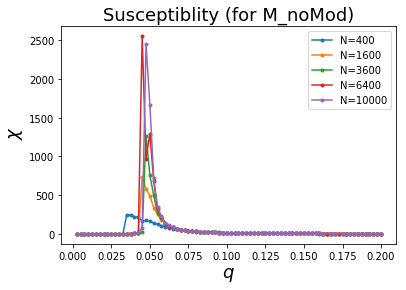

In [10]:
net_sizes = N[:]

for n in net_sizes:
    phys_quant.loc[n].X_noMod.plot(label='N=%d' % n, marker='.')

#plt.yscale('log') 
#plt.yscale('log')    
    
plt.xlabel('$q$', fontsize=18)
plt.ylabel(r'$\hspace{0.3}\chi$', fontsize=18) 
plt.title('Susceptiblity (for M_noMod)', fontsize=18)
plt.legend(loc='best')
#plt.xlim(0,0.02)
plt.show()

### Binder cumulant

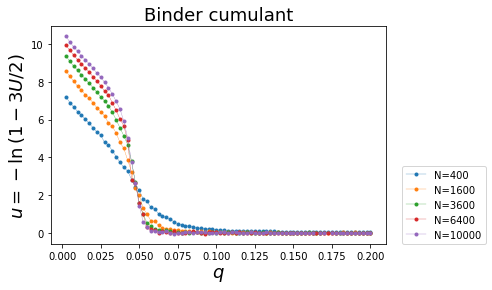

In [11]:
net_sizes = N[:]

for n in net_sizes:
    phys_quant.loc[n].u.plot(label='N=%d' % n, marker='.',lw=0.3)

plt.xlabel('$q$', fontsize=18)
plt.ylabel(r'$u = -\ln\hspace{0.2}(1-3U/2)$', fontsize=18) 
plt.title('Binder cumulant', fontsize=18)
plt.legend(loc=(1.05,0))
#plt.xlim(0.0,0.001)
#plt.ylim(1.8,)

plt.show()

### Scale test for the magnetization far from critical point

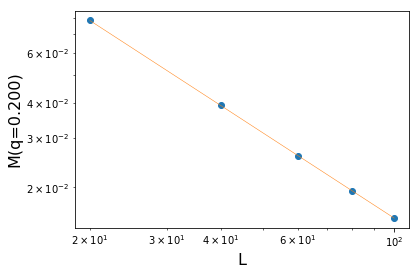

M(q=0.200000) ~ L^(-1.002 ± 0.002)

R² = 0.999985


In [12]:
q_max = max(phys_quant.index.levels[1])
test_scale_M_L(q_max, var_scale='L')

<br><br>
## Testing

In [13]:
# For plots, I test just doing a visual inspection.